<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP

### Contents:
- [Modeling & Evaluation](#Modeling-&-Evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve , PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier , AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier ,plot_tree

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk import bigrams

import re
import string
import pickle
import contractions



# Modeling & Evaluation

- Model 1 : Logistic Regression
- Model 2 : Naive Bayes
- Model 3 : Random Forests

### Model Training:

- Split the dataset into training and validation sets.
- Train the chosen model on the training set.
- Fine-tune hyperparameters to improve performance.

In [2]:
#load picked df
df = pickle.load(open('data/df_clean.pkl', 'rb'))
stopwords = np.loadtxt('data/stopwords.txt', dtype=str)

In [3]:
df.head()

,vote,title,text,topic,year,month,post_length,word_count,tokenized,lemmatized,stemmed,lem_no_stopwords
0,2,Voice echo galaxy s2,redditors im using my sgs2 for a month now wor...,samsung,2011,7,404,74,redditors im using my sgs2 for a month now wor...,redditors im using my sgs2 for a month now wor...,redditor im use my sgs2 for a month now work g...,redditors using sgs2 month work great voicecal...
1,5,Got a new Samsung TV do I have to use the Sams...,the tv is the un46d6000 i found generic wirele...,samsung,2011,11,131,27,the tv is the un46d6000 i found generic wirele...,the tv is the un46d6000 i found generic wirele...,the tv is the un46d6000 i found gener wireless...,tv un46d6000 found generic wireless usb adapte...
2,5,"The more I read about the Nexus Prime, the les...",every day a new reason appears to make the pri...,samsung,2011,11,601,111,every day a new reason appears to make the pri...,every day a new reason appears to make the pri...,everi day a new reason appear to make the prim...,every day new reason appears make prime look l...
3,2,"Reddit, please help me choose (options and pre...",i am from india and my budget is about 400 usd...,samsung,2012,1,767,142,i am from india and my budget is about 400 usd...,i am from india and my budget is about 400 usd...,i am from india and my budget is about 400 usd...,india budget 400 usd 20000 indian rupee shorti...
4,2,Samsung Galaxy R Battery?,this shows a comparison between galaxy s2 and ...,samsung,2012,1,634,133,this shows a comparison between galaxy s2 and ...,this show a comparison between galaxy s2 and g...,thi show a comparison between galaxi s2 and ga...,show comparison galaxy s2 galaxy r battery spe...


In [4]:
# Drop columns
df.drop(columns=['tokenized' , 'lemmatized' , 'stemmed'])

,vote,title,text,topic,year,month,post_length,word_count,lem_no_stopwords
0,2,Voice echo galaxy s2,redditors im using my sgs2 for a month now wor...,samsung,2011,7,404,74,redditors using sgs2 month work great voicecal...
1,5,Got a new Samsung TV do I have to use the Sams...,the tv is the un46d6000 i found generic wirele...,samsung,2011,11,131,27,tv un46d6000 found generic wireless usb adapte...
2,5,"The more I read about the Nexus Prime, the les...",every day a new reason appears to make the pri...,samsung,2011,11,601,111,every day new reason appears make prime look l...
3,2,"Reddit, please help me choose (options and pre...",i am from india and my budget is about 400 usd...,samsung,2012,1,767,142,india budget 400 usd 20000 indian rupee shorti...
4,2,Samsung Galaxy R Battery?,this shows a comparison between galaxy s2 and ...,samsung,2012,1,634,133,show comparison galaxy s2 galaxy r battery spe...
...,...,...,...,...,...,...,...,...,...
21854,3,Can the Mid-2007 Macbook output 5.1 sound?,i keep finding conflicting posts with google a...,apple,2010,11,204,41,keep finding conflicting post google really wa...
21855,1,Previous generation iMac on clearance... I had...,three years ago i go my macbook pro top of the...,apple,2010,11,208,28,three year ago go macbook pro top line previou...
21856,3,What is a good and free mind-mapping applicati...,i have to write an essay and mindmaps help,apple,2010,12,42,9,write essay mindmaps help
21857,8,"Bi-monthly ""what apps do you use"" ipad Posting",news washington post nyt wsj slate the economi...,apple,2010,12,241,39,news washington post nyt wsj slate economist g...


In [5]:
# Duplicate data for use in model
df_model = df.copy()

In [6]:
#Engineer a feature to turn topic into a 1/0 column, where 1 indicates apple.
df_model['class'] = df_model['topic'].map({'apple': 1 , 'samsung' : 0})

In [7]:
X = df_model['lem_no_stopwords']
y = df_model['class']

In [8]:
# Propotion of topic in data sets
y.value_counts(normalize = True)

1    0.522394
0    0.477606
Name: class, dtype: float64

In [9]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [10]:
# Propotion of topic in the train data sets
y_train.value_counts(normalize = True)

1    0.522384
0    0.477616
Name: class, dtype: float64

In [11]:
# Propotion of topic in the test data sets
y_test.value_counts(normalize = True)

1    0.522415
0    0.477585
Name: class, dtype: float64

### Model 1 : Logistic Regression

In [12]:
# Create a tokenize object
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens


In [13]:
pipe_lr = Pipeline([
    ('cvec', CountVectorizer(tokenizer=tokenize, stop_words=list(stopwords), token_pattern=None)),
    ('lr', LogisticRegression(solver='liblinear'))
])

In [14]:
#Fit the model
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 token_pattern=None,
                                 tokenizer=<function tokenize at 0x0000017B45B36DE0>)),
                ('lr', LogisticRegression(solver='liblinear'))])

In [15]:
#Train score
lr_acc_train = pipe_lr.score(X_train, y_train)
lr_acc_train

0.9809162799817005

In [16]:
#Test score
lr_acc_test = pipe_lr.score(X_test, y_test)
lr_acc_test

0.8982921622445867

In [17]:
# Generate predictions!
predictions = pipe_lr.predict(X_test)
predictions[:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [18]:
confusion_matrix(y_test , predictions)

array([[2788,  344],
       [ 323, 3103]], dtype=int64)

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [20]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 2788
False Positives: 344
False Negatives: 323
True Positives: 3103


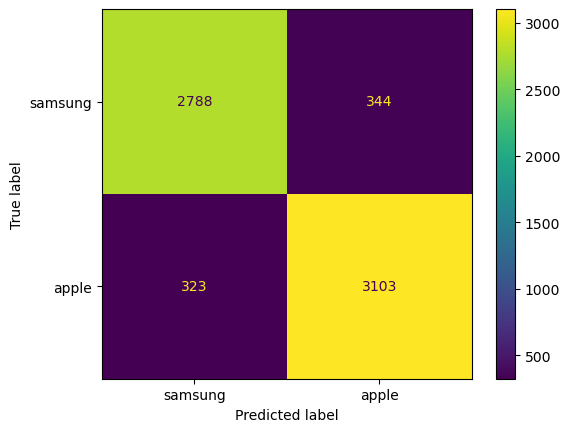

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test , pipe_lr.predict(X_test)) , display_labels = ['samsung' , 'apple'])
disp.plot()

In [22]:
# Calculate precision
precision = precision_score(y_test, predictions)
precision

0.900203075137801

In [23]:
# Calculate recall
recall = recall_score(y_test, predictions)
recall

0.9057209573847051

In [24]:
# Calculate F1 score
f1 = f1_score(y_test, predictions)
f1

0.9029535864978903

### Model 2 : Naive Bayes

In [25]:
#Vocabulary size
cvec = CountVectorizer()
X_train_cvec = cvec.fit_transform(X_train)
X_train_cvec

<15301x29380 sparse matrix of type '<class 'numpy.int64'>'
	with 528674 stored elements in Compressed Sparse Row format>

In [26]:
# Instantiate our CountVectorizer.
cvec = CountVectorizer(max_features=500, stop_words=list(stopwords))

In [27]:
# Fit our CountVectorizer on the training data and transform training data.
X_train_cvec = cvec.fit_transform(X_train)

In [28]:
# Transform our testing data with the already-fit CountVectorizer.
X_train_cvec

<15301x500 sparse matrix of type '<class 'numpy.int64'>'
	with 299173 stored elements in Compressed Sparse Row format>

In [29]:
X_test_cvec = cvec.transform(X_test)

In [30]:
X_test_cvec_df = pd.DataFrame(X_test_cvec.todense() ,columns = cvec.get_feature_names_out() )
X_test_cvec_df.head()

,10,100,13,15,20,able,access,account,actually,add,...,working,worth,wouldnt,wrong,x200b,year,yesterday,yet,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Common words in Test dataset
X_test_cvec_df.sum().sort_values(ascending=False).head()

phone      3314
apple      2416
like       2134
get        2064
samsung    1769
dtype: int64

In [32]:
# Instantiate model!
nb = MultinomialNB(class_prior=[0.5,0.5])

In [33]:
# Fit model!
model = nb.fit(X_train_cvec , y_train)

In [34]:
# Generate predictions!
predictions = nb.predict(X_test_cvec)
predictions[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [35]:
# Score our model on the training set.
nb.score(X_train_cvec , y_train)

0.8700084961767205

In [36]:
# Score our model on the testing set.
nb.score(X_test_cvec , y_test)

0.8569685879841415

In [37]:
# Generate a confusion matrix.
confusion_matrix(y_test , nb.predict(X_test_cvec))

array([[2781,  351],
       [ 587, 2839]], dtype=int64)

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [39]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 2781
False Positives: 351
False Negatives: 587
True Positives: 2839


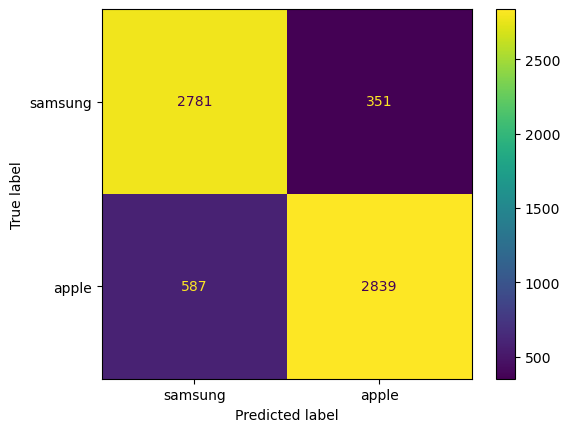

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test , nb.predict(X_test_cvec)) , display_labels = ['samsung' , 'apple'])
disp.plot()

In [41]:
# Calculate precision
precision = precision_score(y_test, predictions)
precision

0.8899686520376175

In [42]:
# Calculate recall
recall = recall_score(y_test, predictions)
recall

0.8286631640396964

In [43]:
# Calculate F1 score
f1 = f1_score(y_test, predictions)
f1

0.8582224909310762

### Model 3 : Random Forests

In [44]:
rf = RandomForestClassifier()

In [45]:
et = ExtraTreesClassifier()

In [46]:
X_train_rf = cvec.fit_transform(X_train)

In [47]:
X_test_rf = cvec.transform(X_test)

In [48]:
rf.fit(X_train_rf, y_train)

RandomForestClassifier()

In [49]:
rf.score(X_train_rf, y_train) #Training Accuracy

0.994052676295667

In [50]:
rf.score(X_test_rf, y_test) # Validation Accuracy

0.8891430314120159

In [51]:
cross_val_score(rf , X_train_rf , y_train , cv=5).mean() # Cross validation score

0.8875235569562683

In [52]:
et.fit(X_train_rf , y_train)

ExtraTreesClassifier()

In [53]:
et.score(X_train_rf, y_train) #Training accuracy on ET model

0.994052676295667

In [54]:
cross_val_score(et , X_train_rf , y_train , cv=5).mean() #Cross validation accuracy on ET model

0.8850399395302061

In [55]:
rf_params = {
    'n_estimators' : [50,100,150,200] ,
    'max_depth' : [None,1,2,3,4,5,6]}

In [56]:
grid = GridSearchCV(rf , param_grid = rf_params , cv=5)

In [57]:
grid.fit(X_train_rf , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]})

In [58]:
grid.best_score_ #cross val accuracy

0.8881116854887441

In [59]:
grid.best_params_

{'max_depth': None, 'n_estimators': 200}

In [60]:
grid.score(X_train_rf , y_train) #Train accuracy

0.994052676295667

In [61]:
grid.score(X_test_rf , y_test) #Validation accuracy

0.8867032631899969

In [62]:
# Generate a confusion matrix.
confusion_matrix(y_test , nb.predict(X_test_rf))

array([[2781,  351],
       [ 587, 2839]], dtype=int64)

In [63]:
# Generate predictions!
predictions_rf = grid.predict(X_test_rf)
predictions[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions_rf).ravel()

In [65]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 2769
False Positives: 363
False Negatives: 380
True Positives: 3046


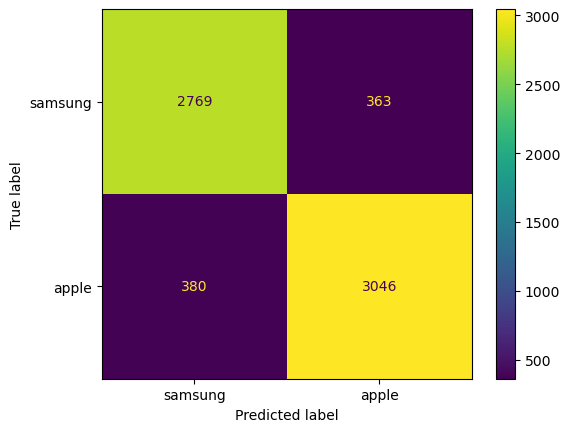

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test , grid.predict(X_test_rf)) , display_labels = ['samsung' , 'apple'])
disp.plot()

In [67]:
# Calculate precision
precision = precision_score(y_test, predictions_rf)
precision

0.8935171604576122

In [68]:
# Calculate recall
recall = recall_score(y_test, predictions_rf)
recall

0.8890834792761237

In [69]:
# Calculate F1 score
f1 = f1_score(y_test, predictions_rf)
f1

0.8912948061448428

## Model Performance Summary

|Model|Vectorizer|Train Accuracy|Test Accuracy|F1 Score|recall|precision|
|---|---|---|---|---|---|---|
|**Logistic Regression**|**CVEC**|**0.98313**|**0.90134**|**0.90020**|**0.90572**|**0.90295**|
|Naive Bayes|CVEC|0.87000|0.85696|0.88996|0.82866|0.85822|
|Random Forest|CVEC|0.99405|0.88670|0.89351|0.88908|0.89129|


# Conclusions and Recommendations

- Conclusions : EDA can help gain insights of consumer preferences and the development of a natural language processing (NLP) model to automatically classify post into the categories of Samsung and Apple would help identify market trends by sorting all data and show how much interaction with each topic.



- Recommendations : Exploring more additional features, such as competitor mentions to identify and extract mentions of competitors in the text. Understanding how Samsung and Apple are discussed in comparison to each other and to other competitors can be informative.